# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

Número de grupo: 13

Nombres de los estudiantes: Esther Babon Arcauz y Claudia López-Mingo Moreno

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `prestamos.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `loan_amnt` es la cantidad de dinero solicitada en dólares
  - `purpose` es el propósito para el que se solicitó el préstamo
  - `revenue` son los ingresos anuales en dólares de la persona que solicitó el préstamos
  - `dti_n` es el porcentaje de endeudamiento sobre los ingresos anuales de la persona que solicitó el préstamo
  - `fico_n` se trata de un indicador de solvencia de la persona que solicitó el préstamo. A mayor puntuación, mayor solvencia, y además se cuenta con estos rangos orientativoss:
    - 300-550: Pobre
    - 550-620: Subprime (alto riesgo)
    - 620-680: Crédito aceptable
    - 680-740: Buen crédito
    - 740-850: Excelente crédito

  -`home_ownership_n` es una variable categórica que indica la situación de vivienda en la que vive la persona solicitante
    - `OWN` es en propiedad
    - `MORTAGAGE` indica que está hipotecada
    - `RENT` indica que vive en alquiler
    - `OTHER` es una categoría que agrega otras posibilidades

- `emp_length` es una variable ordinal, no es estrictamente numérica, ya que el valor 0 denota que no consta información, los valores entre 1 y 10 indican una permanencia inferior a X años, y el valor 11 indica una permanencia superior a 10 años.
- `Default` es la variable que usaremos como **variable objetivo** del conjunto de datos e indica si la persona incumplió (incurrió en *default*) o no el préstamo.


Como pandas no tiene forma de saber que las variables `home_ownership_n`, `purpose`, `emp_length` y `Default` son en realidad categóricas, debes indicárselo tú.

In [1]:
##Primero debemos importar la herramienta de pande desde numpy
import numpy as np
import pandas as pd

In [2]:
##creamos el dataframe a partir de fichero prestamos.csv
df_prestamos = pd.read_csv('prestamos.csv')
df_prestamos

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0
...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0


In [3]:
##indicar las variables categóricas 
df_prestamos['home_ownership_n'] = df_prestamos['home_ownership_n'].astype('category')
df_prestamos['emp_length_n'] = df_prestamos['emp_length_n'].astype('category')
df_prestamos['Default'] = df_prestamos['Default'].astype('category')
df_prestamos['purpose'] = df_prestamos['purpose'].astype('category')


df_prestamos

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0
...,...,...,...,...,...,...,...,...
13789,1275,vacation,42000.0,31.89,792.0,RENT,0,0
13790,1200,vacation,36000.0,12.27,747.0,MORTGAGE,8,0
13791,1000,vacation,76000.0,25.26,702.0,MORTGAGE,11,0
13792,1000,vacation,32000.0,17.70,747.0,MORTGAGE,0,0


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [4]:
##Primero analizamos la descripción estadistica de todas las variables númericas
df_prestamos.describe()

,loan_amnt,revenue,dti_n,fico_n
count,13794.000000,1.379400e+04,13794.000000,13794.000000
mean,14507.833116,7.973730e+04,18.825106,699.106822
std,9037.938271,5.646358e+04,9.795986,32.825754
min,1000.000000,7.000000e+03,0.000000,662.000000
25%,7300.000000,4.800000e+04,12.200000,672.000000
50%,12000.000000,6.800000e+04,18.085000,692.000000
75%,20000.000000,9.700000e+04,24.757500,717.000000
max,40000.000000,1.650000e+06,190.870000,847.500000


In [5]:
##Podemos presentar la tabla anterior de forma más legible mediante la transpuesta
df_prestamos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,13794.0,14507.833116,9037.938271,1000.0,7300.0,12000.000,20000.0000,40000.00
revenue,13794.0,79737.299507,56463.579892,7000.0,48000.0,68000.000,97000.0000,1650000.00
dti_n,13794.0,18.825106,9.795986,0.0,12.2,18.085,24.7575,190.87
fico_n,13794.0,699.106822,32.825754,662.0,672.0,692.000,717.0000,847.50




### ANALISIS DE LA DISTRIBUCIÓN DE LAS VARIABLES NÚMERICAS:

Teniendo en cuenta:

- mean -> media aritmetica
- std -> deviacion tipica
- min -> valor minimo observado
- 25% -> primer cuartil, el valor que deja a su izquierda el 25% de los datos
- 50% -> segundo cuatril, el valor que deja a su izquierda el 50% de los datos
- 75% -> tercer cuatril, el valor que deja a su izquierda el 75% de los datos
- max -> valor maximo observado

Tenemos datos de 13794 personas diferentes que pidieron un prestamo.

Vemos que la media de la variable que indica la solvencia (`fico_n`) es de 699 y su valor mínimo es de 662, según los rangos orientativos que nos dan podemos decir que todas las personas que pidieron el prestamo tienen buen crédito o excelente crédito, con este dato podriamos asumir que todos devolveran el prestamo. Pero tenemos que tener en cuenta las otras dos variables antes de afirmarlo.

Podriamos decir que la variable que indica los ingresos anuales de la persona que solicito el prestamo (`revenue`) junto al porcentaje de endeudamiento sobre los ingresos anuales (`dti_n`) tienen relación con la variable que indica la solvencia. 
Vemos que el mínimo de ingresos anuales es de 7000 que es algo bajo y debería de indicar un valor de solvencia bajo, a no ser que el porcentaje de endeudamiento sea muy bajo también. Vemos que el valor del porcentaje de endeudamiento minimo es de 0, por lo que tiene sentido que el valor de solvencia medio sea alto. 

Sobre la variable de prestamo pedido (`loan_amnt`), vemos que el valor los valores medios, mínimos y máximos. Esta variable junto a la variable de ingresos anuales nos dara el valor de endeudamiento sobre los ingresos anuales que ya hemos comentado. 

Si miramos la media de ingresos anuales y del porcentaje de endeudamiento, vemos que ela media de ingresos en alta y el porcentaje de endeudamiento es bajo. Con estos datos y lo dicho sobre la variable de solvencia podriamos asumir que todos lo que pidieron el prestamo lo devolveran. 





In [6]:
##Podemos ver el analisis bivariante, que muestra la relación entre las variables
df_prestamos.corr()

,loan_amnt,revenue,dti_n,fico_n
loan_amnt,1.000000,0.424460,0.034134,0.090869
revenue,0.424460,1.000000,-0.137616,0.091204
dti_n,0.034134,-0.137616,1.000000,-0.057580
fico_n,0.090869,0.091204,-0.057580,1.000000


Vemos que las que mayor correlación tienen son las variables `loan_amnt` y `revenue`, asi que vamos a mostrar el diagrama de dispersión entre las dos variables.

<AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>

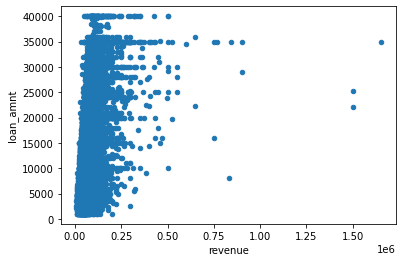

In [7]:
df_prestamos.plot.scatter(x = 'revenue', y= 'loan_amnt')

array([[<AxesSubplot:xlabel='loan_amnt', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='dti_n', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='fico_n', ylabel='loan_amnt'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='revenue'>,
        <AxesSubplot:xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot:xlabel='dti_n', ylabel='revenue'>,
        <AxesSubplot:xlabel='fico_n', ylabel='revenue'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='dti_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='dti_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='dti_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='dti_n'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='fico_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='fico_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='fico_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='fico_n'>]], dtype=object)

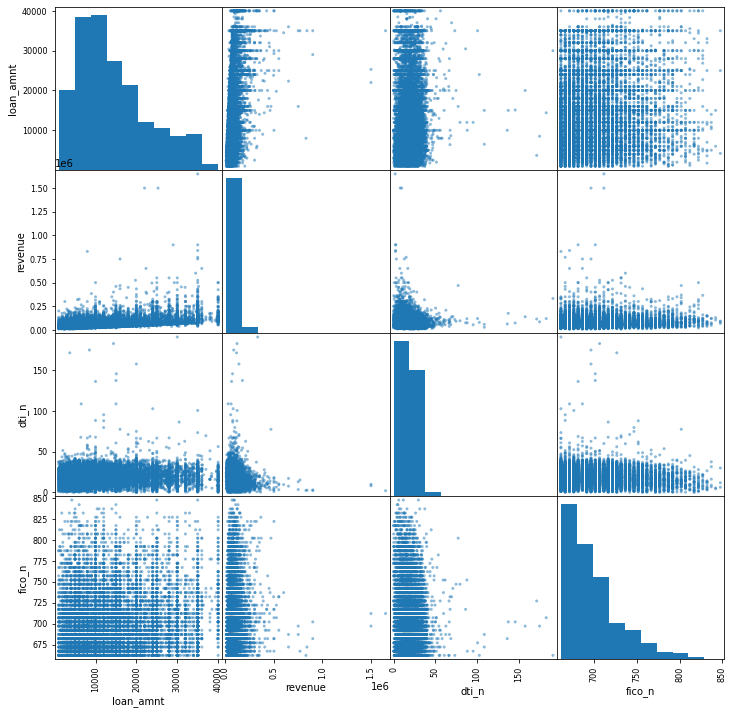

In [8]:
##primero sacar bien el de arriba y luego arreglar este 
from pandas.plotting import scatter_matrix
%matplotlib inline

scatter_matrix(df_prestamos, figsize = (12, 12), diagonal = 'hist')

### Analisis de las variables númericas en conjunto

Como todavía no hemos escalado los datos, son difíciles de analizar. Aun asi podemos observar la correlación de las variables númericas. La mayor correlación es entre `loan_amnt`y `revenue`. En la grafica superior podemos observar la corrrelación de todas las variables entre ellas. Si comparamos la grafica de `loan_amnt`y `revenue`con las demas, vemos que es la que mas se parece a una linea diagonal (x = y). Tampoco podemos fiarnos mucho de las graficas ya que no estan escaladas. También podemos observar que la grafica de las variables `fico_n`y `revenue` (la segunda mayor correlación) esta ligeramente inclinada, tendiendo a una linea diagonal. En el caso contrario, cuando la correlación tiene menor valor, entre las variables `dti_n`y `loan_amount`, observamos que la gráfica no se inclina hacia la diagonal. En el caso de una correlación negativa, como la de `dti_n` y `revenue`, vemos que se parece a la diagonal negativa (-x = y). 


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [9]:
# Las variables categóricas requieren una selección por el tipo de variable
df_prestamos.describe(include=['category']).transpose()

,count,unique,top,freq
purpose,13794,12,debt_consolidation,7841
home_ownership_n,13794,4,MORTGAGE,6850
emp_length_n,13794,12,11,4612
Default,13794,2,0,10785


In [10]:
df_prestamos.groupby('purpose').describe()

loan_amnt                                               \
                       count          mean           std     min      25%   
purpose                                                                     
car                    154.0   8940.909091   6440.856377  1400.0  4356.25   
credit_card           2960.0  14750.582770   8719.990873  1000.0  8000.00   
debt_consolidation    7841.0  15331.969774   8865.044154  1000.0  8275.00   
home_improvement      1016.0  14352.436024   9623.463775  1000.0  6400.00   
house                   70.0  15540.714286  10231.562749  2500.0  7037.50   
major_purchase         337.0  11265.504451   9357.827863  1000.0  5000.00   
medical                163.0   9653.220859   7556.962260  1000.0  4100.00   
moving                 124.0   8313.104839   7037.344103  1000.0  3600.00   
other                  883.0  10883.550396   9000.683266  1000.0  4125.00   
renewable_energy        13.0  10682.692308   7911.603982  2000.0  3600.00   
small_business         145.0  17259.310345  10690.486078  1500.0  8225.00   
vacation                88.0   6160.227273   5877.989135  1000.0  2725.00   

                                              revenue                 ...  \
                        50%      75%      max   count           mean  ...   
purpose                                                               ...   
car                  7000.0  11200.0  32000.0   154.0   64769.422078  ...   
credit_card         12000.0  20000.0  40000.0  2960.0   80666.875838  ...   
debt_consolidation  14000.0  20000.0  40000.0  7841.0   78099.445168  ...   
home_improvement    12000.0  20000.0  40000.0  1016.0   96373.197559  ...   
house               12000.0  23800.0  40000.0    70.0   87978.194857  ...   
major_purchase       8400.0  15000.0  40000.0   337.0   76359.045104  ...   
medical              7225.0  13600.0  35000.0   163.0   74777.779141  ...   
moving               6000.0  10000.0  40000.0   124.0   77731.419355  ...   
other                8000.0  15000.0  40000.0   883.0   73975.084836  ...   
renewable_energy    10575.0  14500.0  28000.0    13.0   77693.076923  ...   
small_business      15000.0  24625.0  40000.0   145.0  101193.461310  ...   
vacation             4000.0   8000.0  30100.0    88.0   69692.500000  ...   

                      dti_n          fico_n                                \
                        75%     max   count        mean        std    min   
purpose                                                                     
car                 22.6050   38.66   154.0  706.191558  40.577095  662.0   
credit_card         24.7925  182.81  2960.0  698.567568  31.380464  662.0   
debt_consolidation  25.3000  174.86  7841.0  697.174212  31.117961  662.0   
home_improvement    22.8100  157.63  1016.0  706.857283  38.516893  662.0   
house               21.7875   32.98    70.0  709.357143  37.703279  662.0   
major_purchase      20.7100   37.32   337.0  709.833828  36.436045  662.0   
medical             25.1450   67.60   163.0  700.098160  34.606289  662.0   
moving              24.7800  108.67   124.0  697.282258  36.332377  662.0   
other               22.5400  190.87   883.0  700.833522  36.252274  662.0   
renewable_energy    25.0500   33.65    13.0  717.384615  51.090669  667.0   
small_business      20.9800   38.72   145.0  708.103448  39.173177  662.0   
vacation            25.6925   37.68    88.0  704.215909  37.222984  662.0   

                                                 
                      25%    50%     75%    max  
purpose                                          
car                 677.0  697.0  727.00  847.5  
credit_card         672.0  692.0  712.00  827.0  
debt_consolidation  672.0  687.0  712.00  847.5  
home_improvement    677.0  697.0  727.00  842.0  
house               677.0  702.0  735.75  797.0  
major_purchase      682.0  707.0  727.00  837.0  
medical             677.0  692.0  717.00  817.0  
moving              672.0  687.0  712.00  827.0  
o

<AxesSubplot:>

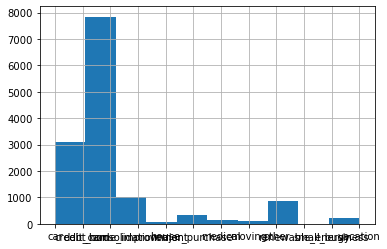

In [11]:
##añadimos diagramas de frecuencia
df_prestamos['purpose'].hist()

Si vemos los propositos por los que se pidieron los prestamos la mayoria son para consolidar una deuda, despues iria pago de tarjeta de credito y mejora de la casa. Viendo que la mayoria pidio el prestamo para consolidar una deuda nos da que pensar, ya que si han estado endeudados ¿que nos garantiza que devolveran el prestamo?

In [12]:
df_prestamos.groupby('home_ownership_n').describe()

loan_amnt                                               \
                     count          mean           std     min      25%   
home_ownership_n                                                          
MORTGAGE            6850.0  15991.120438   9338.103321  1000.0  8781.25   
OTHER                  9.0  19372.222222  13647.369506  3200.0  6500.00   
OWN                 1586.0  13803.893443   8938.053518  1000.0  7000.00   
RENT                5349.0  12808.852122   8315.648697  1000.0  6000.00   

                                            revenue                 ...  \
                      50%      75%      max   count           mean  ...   
home_ownership_n                                                    ...   
MORTGAGE          15000.0  22000.0  40000.0  6850.0   90490.882996  ...   
OTHER             16800.0  32000.0  35000.0     9.0  108333.333333  ...   
OWN               11200.0  20000.0  40000.0  1586.0   74532.390271  ...   
RENT              10425.0  17500.0  40000.0  5349.0   67461.280596  ...   

                    dti_n          fico_n                                \
                      75%     max   count        mean        std    min   
home_ownership_n                                                          
MORTGAGE          24.9600  190.87  6850.0  701.528540  34.096225  662.0   
OTHER             23.3300   33.54     9.0  700.888889  30.080909  662.0   
OWN               25.2175  108.71  1586.0  701.843001  34.434608  662.0   
RENT              24.1800  174.86  5349.0  695.191251  30.205372  662.0   

                                              
                    25%    50%    75%    max  
home_ownership_n                              
MORTGAGE          677.0  692.0  717.0  847.5  
OTHER             677.0  702.0  707.0  767.0  
OWN               677.0  692.0  717.0  847.5  
RENT              672.0  687.0  712.0  832.0  

[4 rows x 32 columns]

<AxesSubplot:>

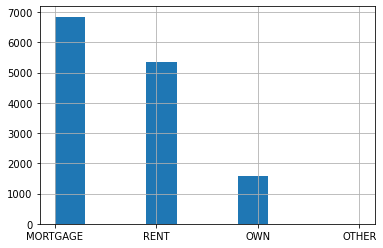

In [13]:
##añadimos diagramas de frecuencia
df_prestamos['home_ownership_n'].hist()

Sobre la variable de propiedad de vivienda, podemos ver que la mayoria de los que pidieron el prestamo tienen una hipoteca. Esto no nos garantiza que vayan a devolver el prestamo, pero si nos dice que tienen sus gastos mensuales planeados, que son organizados con sus gastos, posiblemente sepan como asumir/planear la devolución del prestamo en si.

In [14]:
df_prestamos.groupby('emp_length_n').describe()

loan_amnt                                                      \
                 count          mean          std     min     25%      50%   
emp_length_n                                                                 
0                875.0  11534.857143  7534.712147  1000.0  6000.0  10000.0   
1               1174.0  14576.597104  9175.786487  1000.0  7500.0  12000.0   
2                909.0  13556.738174  8957.198263  1000.0  6500.0  11200.0   
3               1232.0  13876.968344  8885.973478  1000.0  7000.0  12000.0   
4               1174.0  14122.082624  8744.609806  1000.0  7025.0  12000.0   
5                815.0  14217.760736  9051.035753  1000.0  7000.0  12000.0   
6                860.0  14571.279070  8948.878504  1000.0  8000.0  12000.0   
7                580.0  14566.810345  8598.210552  1000.0  7800.0  12000.0   
8                470.0  14331.914894  9157.422395  1000.0  7000.0  12000.0   
9                599.0  14767.904841  9181.739899  1000.0  7200.0  12600.0   
10               494.0  14501.417004  8954.044720  1000.0  7550.0  12000.0   
11              4612.0  15525.390286  9277.337867  1000.0  8000.0  14000.0   

                                revenue                ...    dti_n          \
                   75%      max   count          mean  ...      75%     max   
emp_length_n                                           ...                    
0             15000.00  40000.0   875.0  53784.734103  ...  27.2500  174.86   
1             20000.00  40000.0  1174.0  81728.888007  ...  24.7975  190.87   
2             18000.00  40000.0   909.0  72649.554400  ...  23.9400   54.53   
3             19506.25  40000.0  1232.0  75690.260057  ...  23.6750   67.60   
4             20000.00  40000.0  1174.0  78169.293722  ...  24.1025  145.65   
5             20000.00  40000.0   815.0  79208.822945  ...  24.5800   87.85   
6             20000.00  40000.0   860.0  78503.368209  ...  23.8950  102.73   
7             20000.00  40000.0   580.0  81162.672293  ...  24.3825   62.70   
8             20000.00  40000.0   470.0  80403.481617  ...  25.0500   48.39   
9             20000.00  40000.0   599.0  83646.094725  ...  24.2250   47.89   
10            20000.00  40000.0   494.0  77907.222429  ...  24.2100   42.85   
11            21000.00  40000.0  4612.0  86795.989614  ...  25.0000  182.81   

              fico_n                                                      \
               count        mean        std    min    25%    50%     75%   
emp_length_n                                                               
0              875.0  701.137143  34.602574  662.0  672.0  692.0  717.00   
1             1174.0  698.328790  31.777775  662.0  672.0  692.0  712.00   
2              909.0  697.566557  31.895569  662.0  672.0  687.0  712.00   
3             1232.0  698.704951  32.317336  662.0  672.0  692.0  712.00   
4             1174.0  698.218058  32.358396  662.0  672.0  692.0  712.00   
5              815.0  697.993865  32.273497  662.0  672.0  692.0  712.00   
6              860.0  699.319767  32.050547  662.0  672.0  692.0  717.00   
7              580.0  696.862069  31.372985  662.0  672.0  687.0  712.00   
8              470.0  697.968085  31.465096  662.0  672.0  689.5  715.75   
9              599.0  697.751252  30.240450  662.0  672.0  692.0  717.00   
10             494.0  700.502024  35.446772  662.0  672.0  692.0  717.00   
11            4612.0  700.138768  33.723070  662.0  677.0  692.0  717.00   

                     
                max  
emp_length_n         
0             822.0  
1             822.0  
2             827.0  
3             847.5  
4             837.0  
5             832.0  
6             817.0  
7             822.0  
8             822.0  
9             842.0  
10            832.0  
11            847.5  

[12 rows x 32 columns]

<AxesSubplot:>

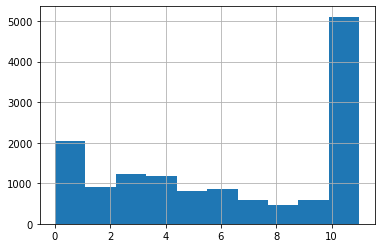

In [15]:
##añadimos diagramas de frecuencia
df_prestamos['emp_length_n'].hist()

Sobre la permanencia del prestamo vemos que la mayoria la tiene de más de 10 años. Esto no nos indica mucho más.

In [16]:
##Podemos sacar una tabla de contingencia que analice los valores de dos variables categóricas de forma cruzada.
pd.crosstab(df_prestamos['home_ownership_n'],df_prestamos['emp_length_n'])

emp_length_n,0,1,2,3,4,5,6,7,8,9,10,11
home_ownership_n,,,,,,,,,,,,
MORTGAGE,398,466,358,504,517,378,400,283,231,300,264,2751
OTHER,0,1,0,0,2,1,2,1,2,0,0,0
OWN,179,113,92,142,120,80,85,61,56,66,44,548
RENT,298,594,459,586,535,356,373,235,181,233,186,1313


Vemos que la mayoria de los que tienen permanencia de más de 10 años tienen una hipoteca.

## Relacionando variables categoricas y numericas


<AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>

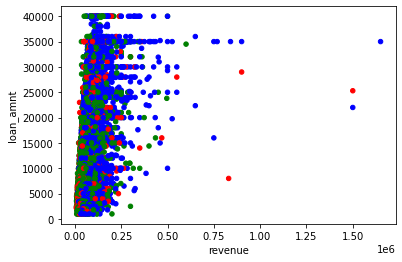

In [17]:
## home ownership
# Podemos usar el color como tercera dimensión para ver cómo se distribuyen los individuos de cada una de las clases
dic_colors = { 'MORTGAGE': 'blue', 'OWN': 'red', 'RENT': 'green', 'OTHER': 'orange'}
colors = df_prestamos['home_ownership_n'].map(dic_colors)

df_prestamos.plot.scatter(x='revenue', y='loan_amnt', c=colors)

En la gráfica superior hemos relacionado las variables `revenue`, `loan_amnt`y `home_ownership_n`. Vemos que la mayoria de los individuos estan hipotecados sin tener en cuenta la cantidad de prestamo solicitado ni los ingresos anuales, aunque la mayoria estan en valores bajos de ingresos. Si observamos los arrendados, vemos que tienen pocos ingresos. Y finalmente observamos que de la variable propiedad de vivienda no hay ninguno de tipo other. 

<AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>

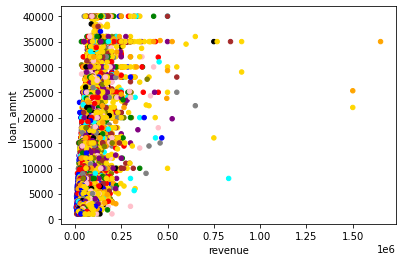

In [18]:
## emp_lenght_n
# Podemos usar el color como tercera dimensión para ver cómo se distribuyen los individuos de cada una de las clases
dic_colors = { 0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple', 5: 'brown', 6: 'pink', 7: 'gray', 8: 'olive', 9: 'cyan', 10: 'black' ,11: 'gold'}
colors = df_prestamos['emp_length_n'].map(dic_colors)

df_prestamos.plot.scatter(x='revenue', y='loan_amnt', c=colors)

Al tener tantos valores la variable `emp_length_n` los resultados son dificiles de interpretar, pero lo que si se ve claro,
es que la mayoria de los individuos tienen valor 11, más de 10 años. 

<AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>

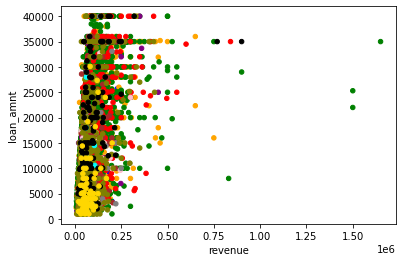

In [19]:
## purpose
# Podemos usar el color como tercera dimensión para ver cómo se distribuyen los individuos de cada una de las clases
dic_colors = { 'car': 'blue', 'credit_card': 'orange', 'debt_consolidation': 'green', 'home_improvement': 'red', 'house': 'purple', 'major_purchase': 'brown', 'medical': 'pink', 'moving': 'gray', 'other': 'olive', 'renewable_energy': 'cyan', 'small_business': 'black','vacation': 'gold'}
colors = df_prestamos['purpose'].map(dic_colors)

df_prestamos.plot.scatter(x='revenue', y='loan_amnt', c=colors)

En esta gráfica vemos la relación entre las variables `revenue`, `loan_amnt` y `purpose`. Principalmente vemos que para la categoria
de vacaciones, el valor de prestamo que piden es bajo y los ingresos son tambien bajos. Para la categoria pequeña empresa,vemos que el 
prestamos pedido es medio-bajo y los ingresos bajos. En cuanto a cantidad, vemos que el más frecuente es la categoria other y la menos frecuente 
es energias renovables. 

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables verdaderamente numéricas. Crea un nuevo dataframe que sólo contenga las variables `loan_amnt`, `revenue`, `dti_n` y `fico_n`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de préstamos similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [20]:
##crear un nuevo dataframe con las columnas seleccionadas
selected_columns = df_prestamos[['loan_amnt', 'revenue', 'dti_n', 'fico_n']]
df_nuevo = selected_columns.copy()
df_nuevo

,loan_amnt,revenue,dti_n,fico_n
0,32000,135000.0,18.93,687.0
1,32000,90000.0,9.29,822.0
2,30000,95000.0,1.34,722.0
3,25750,230000.0,6.42,747.0
4,25200,72000.0,30.95,692.0
...,...,...,...,...
13789,1275,42000.0,31.89,792.0
13790,1200,36000.0,12.27,747.0
13791,1000,76000.0,25.26,702.0
13792,1000,32000.0,17.70,747.0


In [21]:
##Viendo el diagrama nos damos cuenta de que debemos normalizar o estandarizar los datos
##podemos probar a normalizalos con el escalador minMax 
##si los estandarizamos se quedarian en valores entre 0 y 1 y son demasiado pequeños 

from sklearn.preprocessing import MinMaxScaler 

##creamos otro dataframe para escalarlo
df_escalado = df_nuevo.copy()


min_max_scaler = MinMaxScaler()


df_escalado[['loan_amnt_e','revenue_e', 'dti_n_e','fico_n_e']] = min_max_scaler.fit_transform(df_nuevo[['loan_amnt', 'revenue','dti_n','fico_n']])

##en df_Escalado guardamos los datos originales y los escalados
##y en df_e solo los escalados 
df_e = df_escalado.loc[:,['loan_amnt_e', 'revenue_e', 'dti_n_e','fico_n_e']].copy()

df_e


,loan_amnt_e,revenue_e,dti_n_e,fico_n_e
0,0.794872,0.077906,0.099177,0.134771
1,0.794872,0.050517,0.048672,0.862534
2,0.743590,0.053561,0.007020,0.323450
3,0.634615,0.135727,0.033635,0.458221
4,0.620513,0.039562,0.162152,0.161725
...,...,...,...,...
13789,0.007051,0.021302,0.167077,0.700809
13790,0.005128,0.017651,0.064285,0.458221
13791,0.000000,0.041996,0.132341,0.215633
13792,0.000000,0.015216,0.092733,0.458221


StandarScaler sigue la distribucion normal estandar, pone la media a 0 y escala los datos a la diferencia de la unidad. MinMaxScaler escala los datos a un rango [0,1] por defecto. Usaremos el escalado MinMax. 


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo con la puntuación (con la función `KMeans.score()`), el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [22]:
##imports de todo lo que vamos a necesitar
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [23]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()
    
    

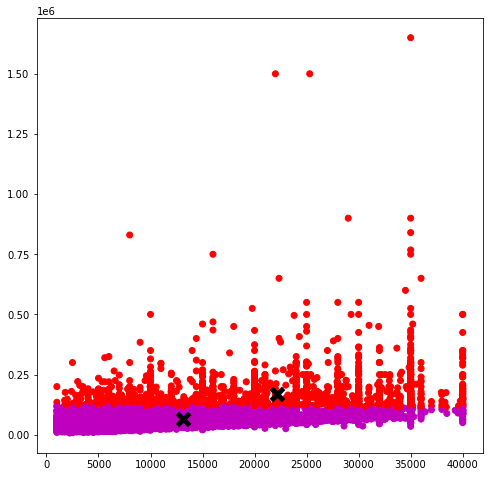

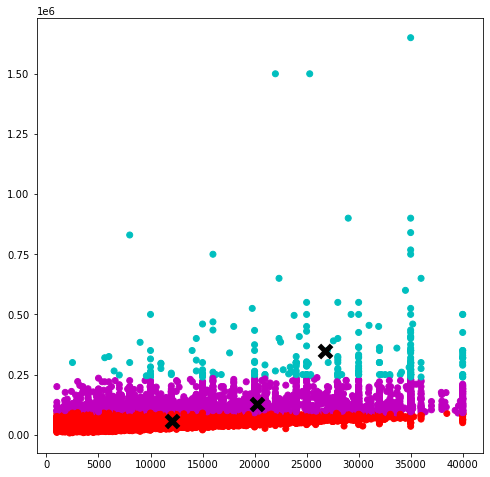

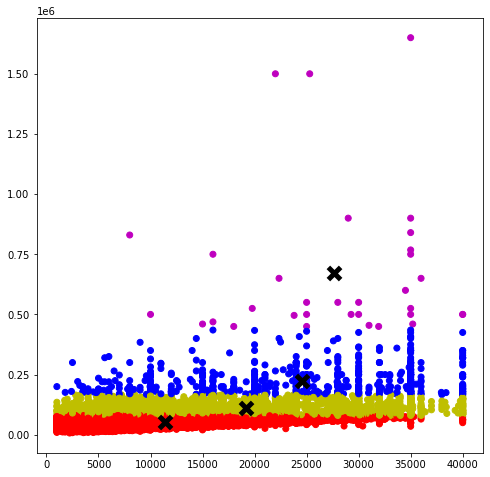

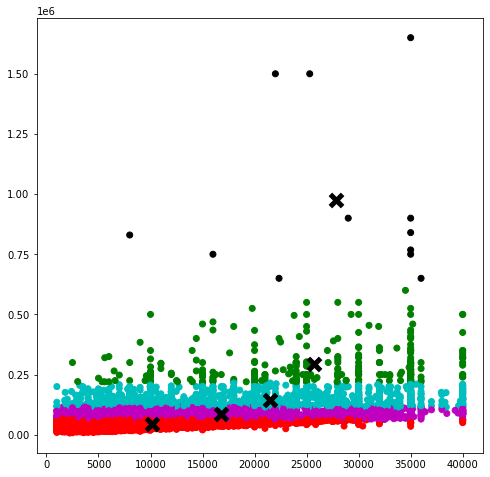

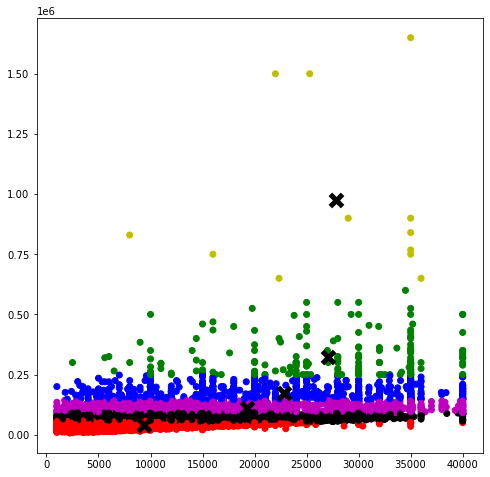

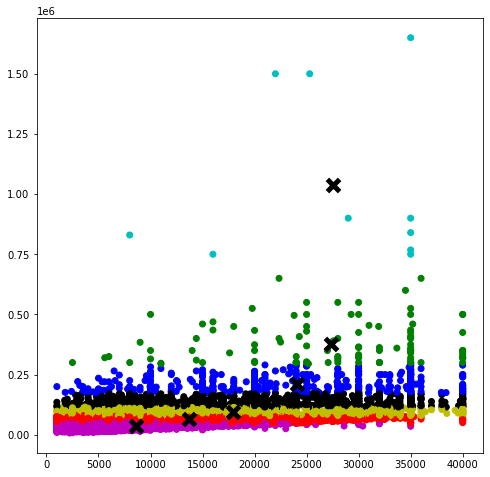

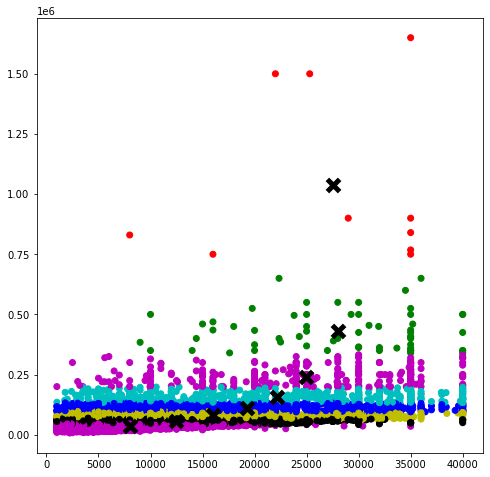

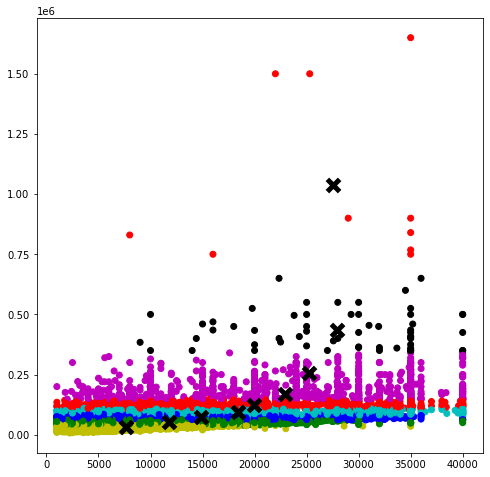

In [24]:
K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    ##calculamos primero las estiquetas de los datos sin escalar
    km.fit(df_nuevo.to_numpy())

    labelsDatosInicial = km.labels_
    
    ##ahora los centros de los datos escalados
    km.fit(df_escalado.to_numpy())
    centerEscalado = km.cluster_centers_
    
    ##como los datos estan escalados añadimos la etiqueta del conjunto de datos original
    plot_clusters(df_escalado.to_numpy(),labelsDatosInicial, centerEscalado)
    
    davies_boulding[k-2] = davies_bouldin_score(df_escalado.to_numpy(), labelsDatosInicial) 

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

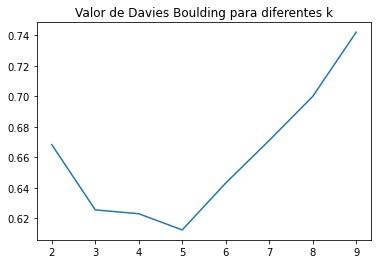

In [25]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

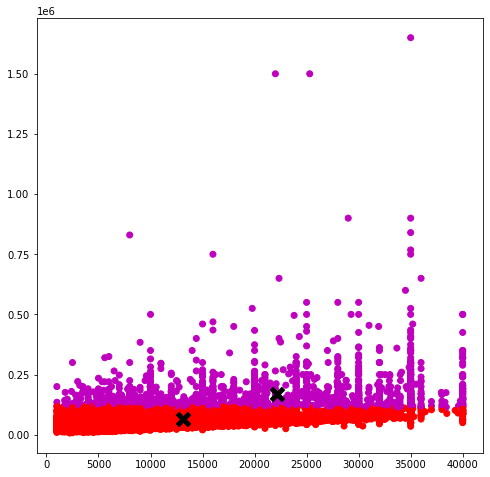

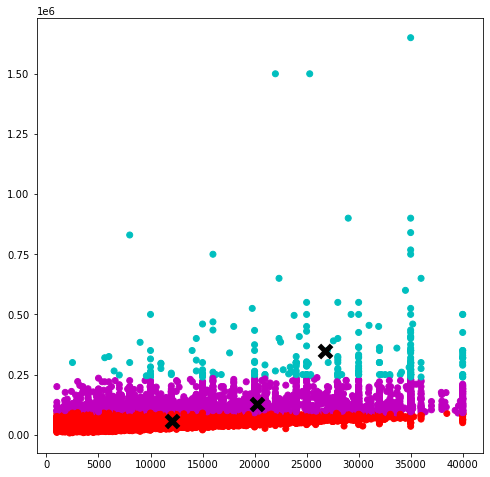

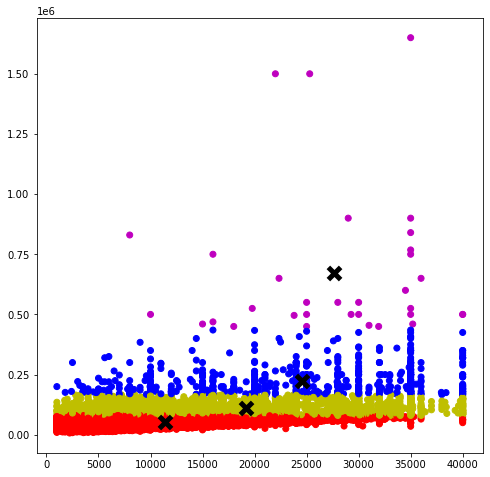

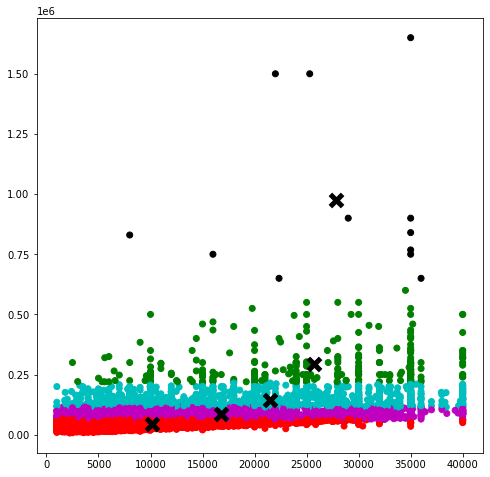

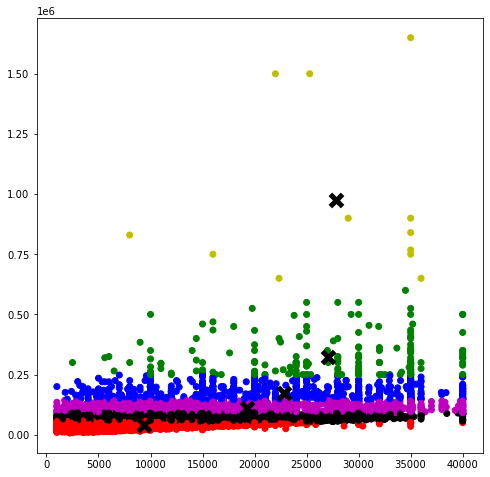

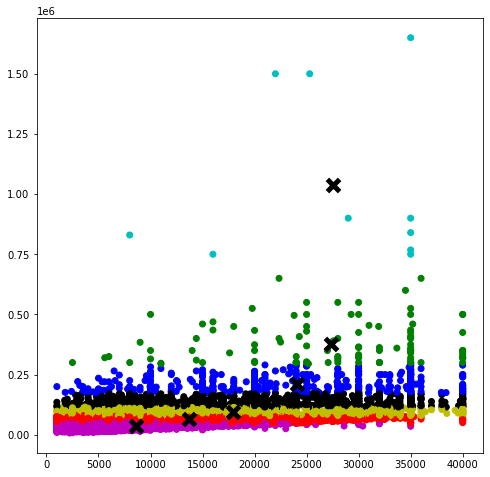

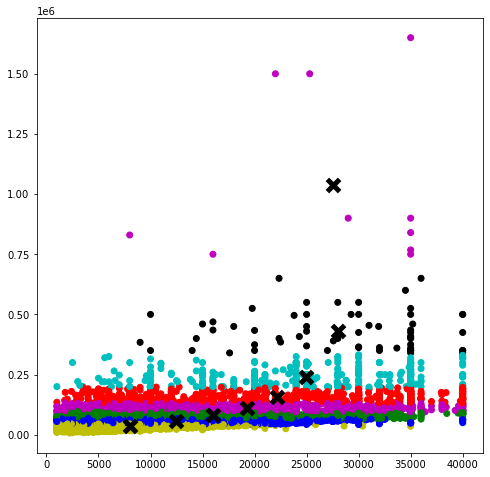

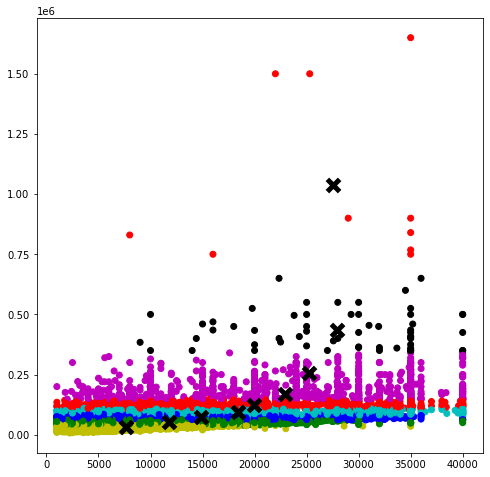

In [26]:
K_MAX = 10
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    ##calculamos primero las estiquetas de los datos sin escalar
    km.fit(df_nuevo.to_numpy())

    labelsDatosInicial = km.labels_
    
    km.fit(df_escalado.to_numpy())
    centerEscalado = km.cluster_centers_
    
    ##como los datos estan escalados añadimos la etiqueta del conjunto de datos original
    plot_clusters(df_escalado.to_numpy(),labelsDatosInicial, centerEscalado)
    silhouette[k-2] = silhouette_score(df_escalado.to_numpy(), labelsDatosInicial) 

Text(0.5, 1.0, 'Valor de Silhouette para diferentes k')

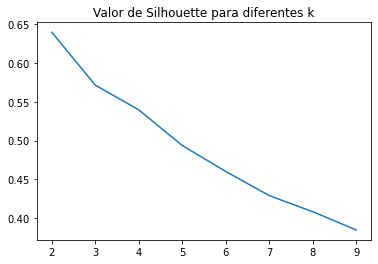

In [27]:
plt.plot(range(2, K_MAX), silhouette)
plt.title('Valor de Silhouette para diferentes k')

Si observamos el diagrama del valor de Silhouette para el número óptimo de clusters, no nos queda muy claro cual es ya que no crea ningun codo, pero sabemos que los valores estan entre el 0,4 y el 0,65 eso indica que no hay existencia de clusters solapados (valor cercano al 0). Valores positivos indican particiones buenas. Con esta informacón y con la que sacamos del diagrama de Davies-Boulding, en la que el codo se ve claramente, el número óptimo de clusters es de 5.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 3, elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de préstamos quedan en cada cluster? Según dicho perfil, ¿qué cluster te parece que tendrá una mayor tasa de "default"? Corrobóralo calculando para cada cluster la proporción de préstamos que acabaron en "default".

Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [28]:
##En primer lugar, podemos ver fácilmente los centroídes elegidos, es decir, 
#el valor que toman las variables en el individuo prototípico de cada cluster.
##Para el numero de clusters que hemos elegido por los valores de davies boulding y Silhouette

km = KMeans(init='random', n_clusters=5, random_state=333)

km.fit(df_nuevo.to_numpy())
labelsOriginal = km.labels_

km.fit(df_escalado.to_numpy())



centers = km.cluster_centers_
centers

array([[2.78041667e+04, 9.74000083e+05, 7.16833333e+00, 6.87416667e+02,
        6.87286325e-01, 5.88557567e-01, 3.75561028e-02, 1.37017071e-01],
       [2.14667450e+04, 1.43773825e+05, 1.67368339e+01, 7.04897074e+02,
        5.24788334e-01, 8.32463938e-02, 8.76870847e-02, 2.31251074e-01],
       [1.68140093e+04, 8.55403375e+04, 1.86427652e+01, 6.99797209e+02,
        4.05487418e-01, 4.78030051e-02, 9.76725795e-02, 2.03758539e-01],
       [2.57570789e+04, 2.92320724e+05, 1.32746595e+01, 7.12376344e+02,
        6.34796894e-01, 1.73658383e-01, 6.95481715e-02, 2.71570588e-01],
       [1.01834863e+04, 4.57882730e+04, 1.98357519e+01, 6.96333027e+02,
        2.35474008e-01, 2.36082002e-02, 1.03922837e-01, 1.85083706e-01]])

In [29]:
##También podemos segmentar los individuos de nuestro conjunto de datos según 
##al cluster al que pertenezcan y utilizar estadísticos descriptivos para ver la distribución 
##de las variables (centralidad, dispersión, rangos, etc).



import pandas as pd

# 
df = pd.DataFrame(data=df_escalado, columns=['loan_amnt_e','revenue_e', 'dti_n_e','fico_n_e'])
df = df.assign(cluster=pd.Series(data=labelsOriginal))
df

,loan_amnt_e,revenue_e,dti_n_e,fico_n_e,cluster
0,0.794872,0.077906,0.099177,0.134771,2
1,0.794872,0.050517,0.048672,0.862534,4
2,0.743590,0.053561,0.007020,0.323450,4
3,0.634615,0.135727,0.033635,0.458221,1
4,0.620513,0.039562,0.162152,0.161725,4
...,...,...,...,...,...
13789,0.007051,0.021302,0.167077,0.700809,0
13790,0.005128,0.017651,0.064285,0.458221,0
13791,0.000000,0.041996,0.132341,0.215633,4
13792,0.000000,0.015216,0.092733,0.458221,0


In [30]:
##Podemos obtener una descripción buena directamente con pandas
df.groupby(["cluster"]).describe().transpose()

cluster                      0           1            2          3  \
loan_amnt_e count  6540.000000  279.000000  1913.000000  12.000000   
            mean      0.235570    0.634797     0.524888   0.687286   
            std       0.149662    0.238918     0.256209   0.235607   
            min       0.000000    0.038462     0.000000   0.179487   
            25%       0.123077    0.487179     0.333333   0.545192   
            50%       0.220513    0.666667     0.512821   0.794872   
            75%       0.333333    0.871795     0.743590   0.871795   
            max       1.000000    1.000000     1.000000   0.897436   
revenue_e   count  6540.000000  279.000000  1913.000000  12.000000   
            mean      0.023614    0.173658     0.083256   0.588558   
            std       0.007634    0.048224     0.014812   0.218119   
            min       0.000000    0.129641     0.065125   0.391357   
            25%       0.018158    0.141205     0.071211   0.452222   
            50%       0.024346    0.153987     0.079732   0.503956   
            75%       0.029614    0.190505     0.092209   0.634814   
            max       0.036519    0.360925     0.126598   1.000000   
dti_n_e     count  6540.000000  279.000000  1913.000000  12.000000   
            mean      0.103925    0.069548     0.087677   0.037556   
            std       0.048175    0.071030     0.056870   0.028804   
            min       0.000000    0.000629     0.000000   0.010216   
            25%       0.069419    0.035993     0.052444   0.013124   
            50%       0.102059    0.059098     0.080474   0.028815   
            75%       0.136022    0.091476     0.112328   0.055483   
            max       0.713575    1.000000     0.957772   0.089537   
fico_n_e    count  6540.000000  279.000000  1913.000000  12.000000   
            mean      0.185028    0.271571     0.231358   0.137017   
            std       0.166481    0.215581     0.189819   0.091556   
            min       0.000000    0.000000     0.000000   0.000000   
            25%       0.053908    0.107817     0.080863   0.053908   
            50%       0.134771    0.215633     0.188679   0.134771   
            75%       0.269542    0.377358     0.323450   0.195418   
            max       0.943396    0.889488     0.970350   0.269542   

cluster                      4  
loan_amnt_e count  5050.000000  
            mean      0.405449  
            std       0.230737  
            min       0.000000  
            25%       0.230769  
            50%       0.358974  
            75%       0.589744  
            max       1.000000  
revenue_e   count  5050.000000  
            mean      0.047814  
            std       0.008113  
            min       0.034084  
            25%       0.041388  
            50%       0.046865  
            75%       0.054218  
            max       0.065916  
dti_n_e     count  5050.000000  
            mean      0.097668  
            std       0.050471  
            min       0.000000  
            25%       0.064651  
            50%       0.092890  
            75%       0.127914  
            max       0.916121  
fico_n_e    count  5050.000000  
            mean      0.203807  
            std       0.180162  
            min       0.000000  
            25%       0.053908  
            50%       0.161725  
            75%       0.296496  
            max       1.000000

array([[<AxesSubplot:xlabel='loan_amnt_e', ylabel='loan_amnt_e'>,
        <AxesSubplot:xlabel='revenue_e', ylabel='loan_amnt_e'>,
        <AxesSubplot:xlabel='dti_n_e', ylabel='loan_amnt_e'>,
        <AxesSubplot:xlabel='fico_n_e', ylabel='loan_amnt_e'>,
        <AxesSubplot:xlabel='cluster', ylabel='loan_amnt_e'>],
       [<AxesSubplot:xlabel='loan_amnt_e', ylabel='revenue_e'>,
        <AxesSubplot:xlabel='revenue_e', ylabel='revenue_e'>,
        <AxesSubplot:xlabel='dti_n_e', ylabel='revenue_e'>,
        <AxesSubplot:xlabel='fico_n_e', ylabel='revenue_e'>,
        <AxesSubplot:xlabel='cluster', ylabel='revenue_e'>],
       [<AxesSubplot:xlabel='loan_amnt_e', ylabel='dti_n_e'>,
        <AxesSubplot:xlabel='revenue_e', ylabel='dti_n_e'>,
        <AxesSubplot:xlabel='dti_n_e', ylabel='dti_n_e'>,
        <AxesSubplot:xlabel='fico_n_e', ylabel='dti_n_e'>,
        <AxesSubplot:xlabel='cluster', ylabel='dti_n_e'>],
       [<AxesSubplot:xlabel='loan_amnt_e', ylabel='fico_n_e'>,
        <Axes

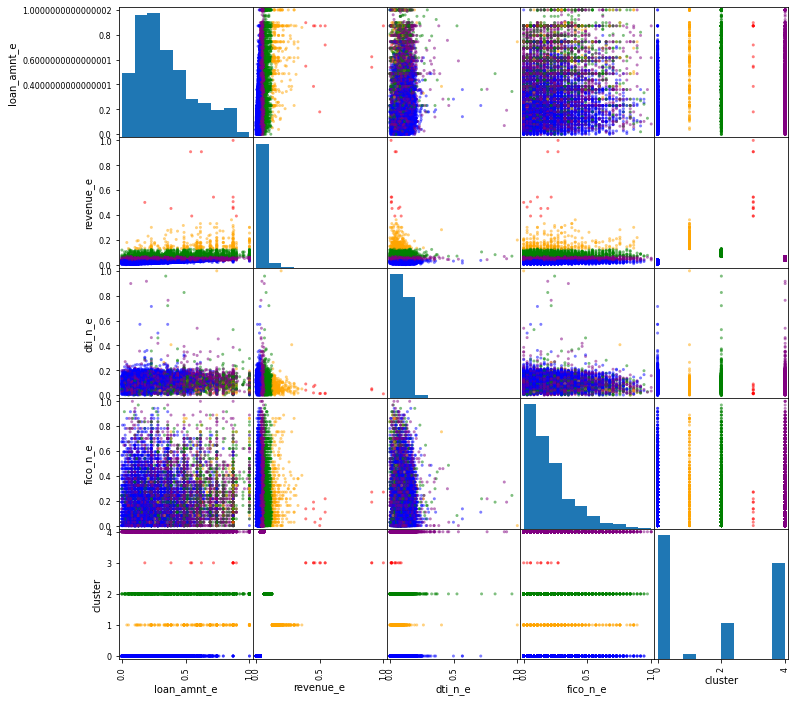

In [31]:
 ##investigar si se puede usar cluster como color
dic_colors = { 0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple'}
colors = df['cluster'].map(dic_colors)
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist',  c=colors)

La tasa de default será más alta cuanto más altos sean los valores de revenue y fico_n y más bajos sean los de loan_amnt y dti_n

<AxesSubplot:xlabel='revenue_e', ylabel='loan_amnt_e'>

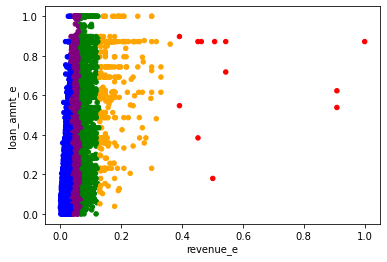

In [ ]:
dic_colors = { 0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple'}
colors = df['cluster'].map(dic_colors)

df.plot.scatter(x='revenue_e', y='loan_amnt_e', c=colors)


Todos los clusters tienen un loan_amnt parecido (cualquier valor), aunque se observa que el 1 y el 3 tienen un loan_amnt mas alto. En cuanto a revenue, los ordenamos de menos revenue a mas: 0,4,2,1,3
Teniendo en cuenta estos datos podemos asumir que los clusters 1 y 3 tendrán mayor tasa de default ya que su perfil es el de mayores ingresos. Se puede observar tambien que el cluster 1 tiene más individuos con baja loan_amnt, con lo cual este sería el de mayor tasa de default.

Usando estas variables los clusters quedan perfectamente separados.

<AxesSubplot:xlabel='revenue_e', ylabel='dti_n_e'>

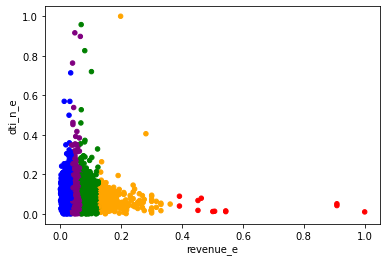

In [ ]:
dic_colors = { 0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple'}
colors = df['cluster'].map(dic_colors)

df.plot.scatter(x='revenue_e', y='dti_n_e', c=colors)

En este diagrama de dispersión podemos observar que casi todos los individuos tienen bajo dti_n. Sin embargo observamos diferencias en los valores de revenue. Según esto, los clusters con mayor revenue y mayor tasa de default serían los clusters 1 y 3, sobre todo este último.

En este diagrama los clusters estan suficientemente separados, aunque los clusters 0,4 y 2 se mezclan ligeramente.

<AxesSubplot:xlabel='revenue_e', ylabel='fico_n_e'>

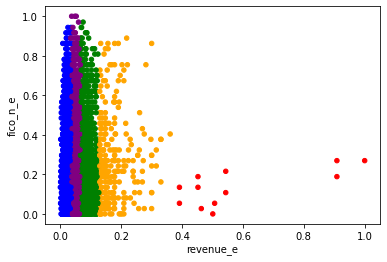

In [ ]:
dic_colors = { 0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple'}
colors = df['cluster'].map(dic_colors)

df.plot.scatter(x='revenue_e', y='fico_n_e', c=colors)

En el caso de comparar revenue con fico_n (buscamos que ambos valores sean altos), volvemos a observar que los clusters con mayor tasa de default serán el 1 y el 3, aunque en este caso podría ser mejor el 1, ya que tiene valores más altos para fico_n, a diferencia del 3.

En este caso los clusters estan perfectamente separados.

<AxesSubplot:xlabel='dti_n_e', ylabel='loan_amnt_e'>

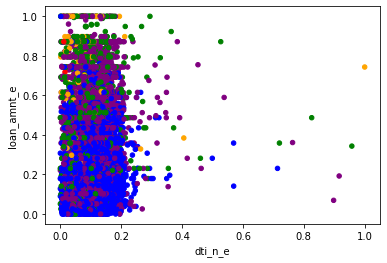

In [ ]:
dic_colors = { 0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple'}
colors = df['cluster'].map(dic_colors)

df.plot.scatter(x='dti_n_e', y='loan_amnt_e', c=colors)

Este diagrama es más dificil de interpretar ya que la correlación entre las variables usadas es muy baja. Sin embargo podemos observar que el cluster 0 está especialmente cerca de los valores bajos para ambas variables y por ello podría tener mayor tasa de default, aunque los analisis anteriores nos indican que esto no es exactamente así.

Aquí podemos observar un batiburrillo de clusters, todos quedan mezclados con todos.

<AxesSubplot:xlabel='fico_n_e', ylabel='loan_amnt_e'>

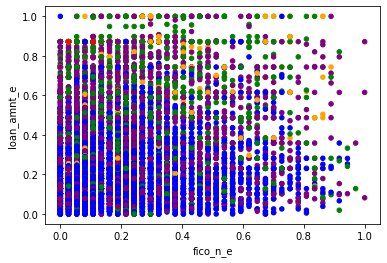

In [ ]:
dic_colors = { 0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple'}
colors = df['cluster'].map(dic_colors)

df.plot.scatter(x='fico_n_e', y='loan_amnt_e', c=colors)

En este caso tampoco podemos hacer observaciones muy exactas por la baja correlación entre las variables. Aún así volvemos a observar que el cluster 0 tiene altos valores de fico_n, con valores bajos de loan_amnt y esto podría llevarnos a la conclusión de que el cluster 0 tiene alta tasa de default.

Los clusters estan mezclados casi por completo aunque podemos ver que en los extremos hay dominancia de algunos clusters concretos.

<AxesSubplot:xlabel='dti_n_e', ylabel='fico_n_e'>

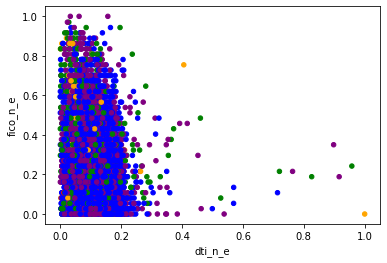

In [ ]:
dic_colors = { 0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple'}
colors = df['cluster'].map(dic_colors)

df.plot.scatter(x='dti_n_e', y='fico_n_e', c=colors)

En este diagrama no podemos sacar conclusiones de ningún tipo ya que no se aprecia ninguna tendencia diferenciable en los clusters.

Una vez más, los clusters están completamente mezclados.

In [ ]:
df['default'] = df_prestamos['Default']
df.loc[:,['default', 'cluster']].groupby('cluster').describe()

default                 
          count unique top  freq
cluster                         
0          6540      2   0  4985
1           279      2   0   232
2          1913      2   0  1582
3            12      2   0     8
4          5050      2   0  3978

In [ ]:
df2 = df.loc[:,['default', 'cluster']]
df3 = df2[df2['default'] == 1]
df3.groupby('cluster').describe()

default                 
          count unique top  freq
cluster                         
0          1555      1   1  1555
1            47      1   1    47
2           331      1   1   331
3             4      1   1     4
4          1072      1   1  1072

Hemos calculado los individuos totales de cada cluster y los individuos cuyo default es 1 para cada cluster, las tasas de default serán las siguientes:

Cluster 0: 23.77%
Cluster 1: 16.84%
Cluster 2: 17.3% 
Cluster 3: 33.33%
Cluster 4: 21.22%

Vemos que las conclusiones sacadas de los diagramas no son exactas, sin embargo el cluster con mayor tasa de default es el 3, cosa que sí habíamos observado anteriormente. Además vemos que aunque en los primeros diagramas se observase lo contrario, la tasa de default del cluster 0 es bastante alta comparada con las demás.